In [3]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.5 MB/s eta 0:00:00


### Importamos las librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos dataset

In [6]:
df_car = pd.read_csv('/content/car_evaluation.csv', header=None)
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Analisis exploratorio de datos

In [7]:
# Analizamos el shape del objeto

df_car.shape

(1728, 7)

In [8]:
#  Vamos a renombrar las columnas de manera correcta

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names 

In [9]:
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Visualizamos los tipos de datos

In [10]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos

- Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categoricos. 
- Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase. 
- La clase es la variable de destino o target. 

In [11]:
# exploremos un poco mas la variable target

df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [12]:
# verificamos los valores missings

df_car.isnull().sum() 

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Podemos observar que el dataset no posee valores nulos

### Procesamiento de datos

In [13]:
# Separamos en X en y

X = df_car.drop(['class'], axis =1) # X son todas las variables sin el target. 
y = df_car['class'] # La variable target. 

In [14]:
# importamos las librerias necesarios p ara la creacion del modelo

from sklearn.model_selection import train_test_split

# 30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42)

In [15]:
# Veamos que obtuvimos

X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [16]:
y_train.shape, y_test.shape

((1209,), (519,))

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [18]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Entrenamiento de modelo de clasificacion con arbol de decision

In [19]:
# Importante todos nuestros tipos de datos son object, realizamos una transformacion

import category_encoders as ce # pip install catedory-encoders

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
                            
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [20]:
# Verificamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [21]:
# Importa arbol de decision

from sklearn.tree import DecisionTreeClassifier

# Creacion de modelo

tree = DecisionTreeClassifier(max_depth=2, random_state=0) # Mas de 5000 datos podriamos subir a 3 el max_depth, random_state es la semilla y se requiere

In [22]:
# Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [23]:
# Calculo de predicciones en Train y Test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [ ]:
y_train_pred_tree # Estas son las prediciones

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

### Evaluacion de modelo de clasificacion con arbol de decision

In [24]:
# Calculo de metricas

from sklearn.metrics import accuracy_score

# Calculo el accuracy en train

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)


# Calculo el accuracy en test

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print("El accuracy en test es: ", test_accuracy_tree) 

El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.626204238921002


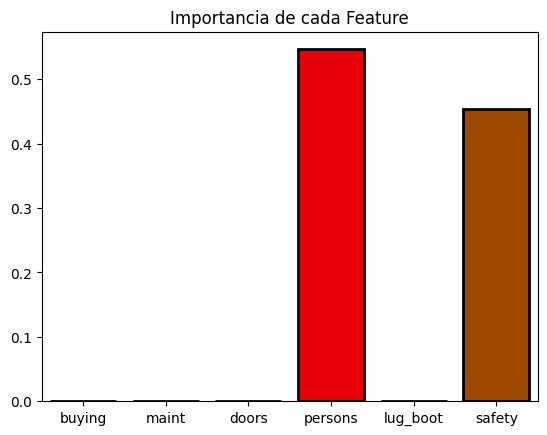

In [25]:
# Verificamos el feature importances

import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()



## Entrenamiento de modelo de clasificacion con random forest

In [36]:
# Importar Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 00000)
rf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10, random_state=0)

In [37]:
# Calculo de las predicciones en Train y Test

y_train_pred_rf =rf.predict(X_train)
y_test_pred_rf =rf.predict(X_test)

## Evaluacion de modelo de clasificacion con random forest

In [38]:
# Calculo de metricas

from sklearn.metrics import accuracy_score

# Calculo de accuracy en Train

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)


# Calculo de accuracy en Test

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(' El accuracy en train es: ', train_accuracy_rf)

print(' El accuracy en test es: ', test_accuracy_rf)


# Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del model_selection



 El accuracy en train es:  0.9942100909842845
 El accuracy en test es:  0.5202312138728323


In [41]:
# Visualizacion de las Featurew importantes

features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

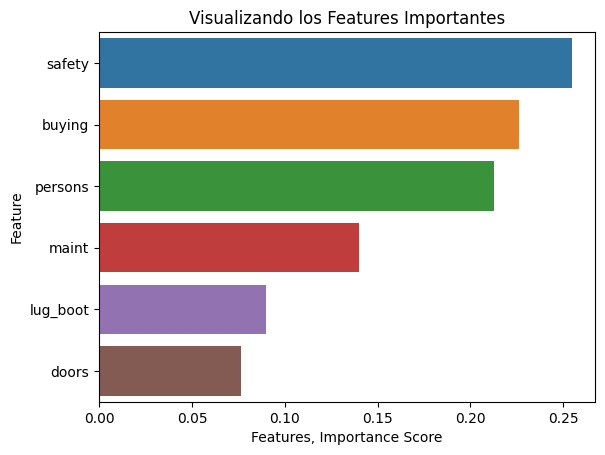

In [42]:
# Grafico de barras

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y = features_scores.index)
plt.xlabel('Features, Importance Score')
plt.ylabel('Feature')
plt.title('Visualizando los Features Importantes')
plt.show()

In [44]:
# Matriz de confusion de RF

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print("Matriz de Confusion\n\n", cm)

Matriz de Confusion

 [[ 18   0  96   4]
 [  3   0  15   1]
 [ 83  18 249   8]
 [  5   0  16   3]]


In [45]:
# RF

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))


# Esta funcion nos muestra el precision, recall, f1 score support de la variable de interes

              precision    recall  f1-score   support

         acc       0.17      0.15      0.16       118
        good       0.00      0.00      0.00        19
       unacc       0.66      0.70      0.68       358
       vgood       0.19      0.12      0.15        24

    accuracy                           0.52       519
   macro avg       0.25      0.24      0.25       519
weighted avg       0.50      0.52      0.51       519

